In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [5]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,7/27/2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,7/27/2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,7/27/2020,7235,60,6028,1147,Europe


In [4]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953  1/22/2020   
1                NaN                Albania  41.153300  20.168300  1/22/2020   
2                NaN                Algeria  28.033900   1.659600  1/22/2020   
3                NaN                Andorra  42.506300   1.521800  1/22/2020   
4                NaN                 Angola -11.202700  17.873900  1/22/2020   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  7/27/2020   
49064            NaN                  Yemen  15.552727  48.516388  7/27/2020   
49065            NaN                Comoros -11.645500  43.333300  7/27/2020   
49066            NaN             Tajikistan  38.861000  71.276100  7/27/2020   
49067            NaN                Lesotho -29.610000  28.233600  7/27/2020   

       

In [9]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,1/22/2020,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915714e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

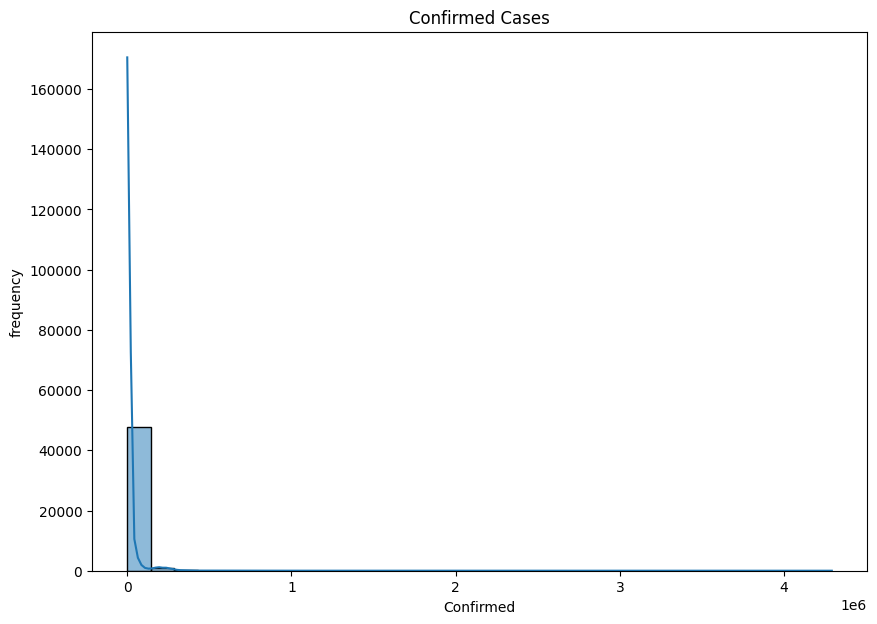

In [12]:
plt.figure(figsize=(10,7))
sns.histplot(df['Confirmed'],bins=30,kde=True)
plt.title('Confirmed Cases')
plt.xlabel('Confirmed')
plt.ylabel('frequency')
plt.show()

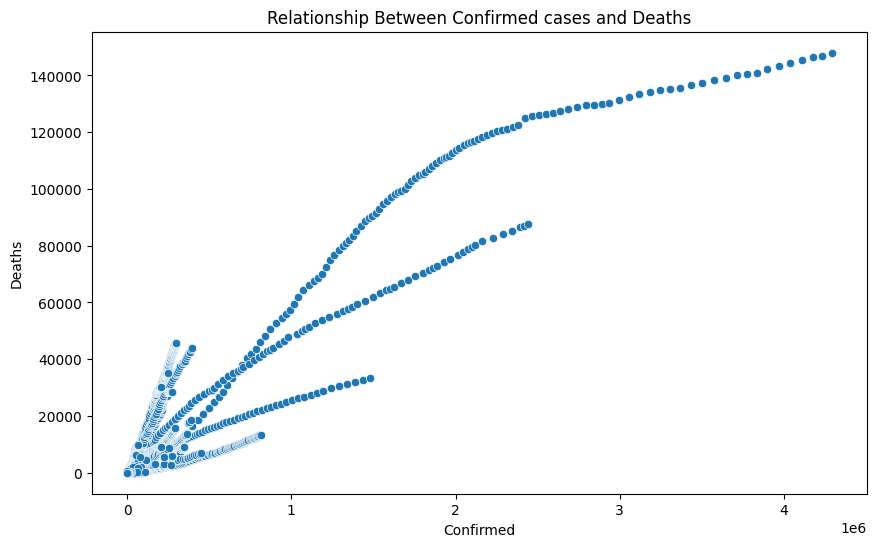

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed',y='Deaths',data=df)
plt.title('Relationship Between Confirmed cases and Deaths')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

In [15]:
country_data=df.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'}).reset_index()
country_data=country_data.sort_values(by='Confirmed',ascending=False)

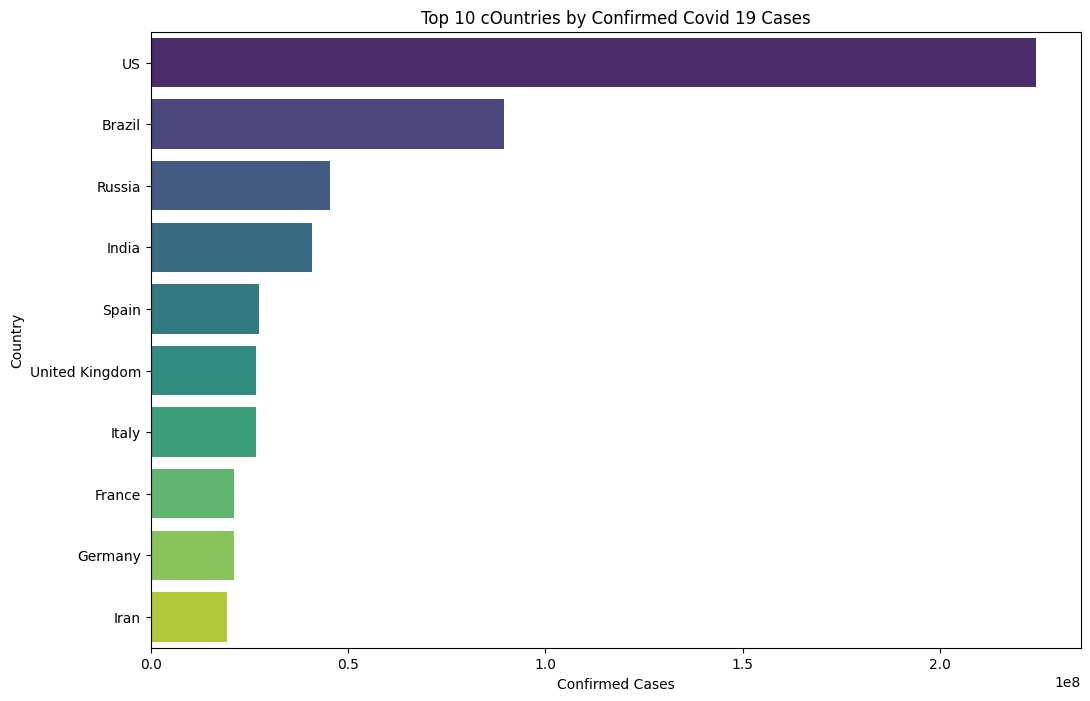

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='Confirmed',y='Country/Region',data=country_data.head(10),palette='viridis')
plt.title('Top 10 cOuntries by Confirmed Covid 19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()